# Optional Exercise 7 - Infinite Impulse Response (IIR) Filters (30 mins)

## Objectives
- To introduce Infinite Impulse Response (IIR) filters


## Video ([Backup Link](https://www.youtube.com/watch?v=-tu2rlqTgcQ))

In [1]:
# Embed Youtube video
from IPython.display import HTML 
HTML('''<script> code_show=true;function code_toggle() {if (code_show){$('.cm-comment:contains(@hidden)').closest('div.input').hide();} else {$('.cm-comment:contains(@hidden)').closest('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><center><iframe width="560" height="315" src="https://www.youtube.com/embed/-tu2rlqTgcQ?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>''') # @hidden

## Lab Exercise
The filter discussed in Exercise 6 belongs to a class known as **Finite Impulse Response (FIR)** filters. It has the property that all output samples depend only on the input samples. For an impulse response that contains many non-zero terms, the amount of computation required to implement the filter may become prohibitively large if the output sequence, $y[n]$, is computed directly as a weighted sum of the past input values. To reduce the number of computations, $y[n]$ may instead be computed recursively, as a sum of present and past input values and past output values. 

In this exercise, we will explore another type of filter which has an impulse response of infinite length, the **Infinite Impulse Response (IIR)** filter. It is a recursive filter because old outputs are fed back to calculate the new output as described by the following equation:

---
**Definition**:
    
$$\text{Infinite Impulse Response (IIR) Filter: }y[n]=\sum^{M}_{k=0}b[k]x[n-k]-\sum^{N}_{k=1}a[k]y[n-k]$$

---

Python provides a function called filter to perform general FIR and IIR filtering.

```python
from scipy import signal
y = signal.filtfilt(b, a, x)
```

where `b` = $\{b[0],\: b[1], \cdots, b[1-M]\}$ and `a` = $\{1,\: a[1], a[2], \cdots, a[N-1]\}$. Note that the FIR filter in Exercise 6 can be implemented using `filtfilt` where `a` = $\{1\}$.


Now let us try to filter `aircrew.wav` using IIR filters, e.g. Butterworth filters.

<audio controls src="files/aircrew.wav"> 
</audio>

In [2]:
import scipy.io
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

from scipy import signal

fs = 44100
band = [1200, 1500]
N = 5

nyq = 0.5 * fs
b_iir_bsf, a_iir_bsf = signal.butter(N, [b/nyq for b in band], btype='bandstop')

fcut = 2000
N = 20

nyq = 0.5 * fs
b_iir_lpf, a_iir_lpf = signal.butter(N,  fcut/nyq, btype='low')

x, fsamp = sf.read('files/aircrew.wav')

y_bs = signal.filtfilt(b_iir_bsf, a_iir_bsf, x)
y_lp = signal.filtfilt(b_iir_lpf, a_iir_lpf, y_bs)

sf.write('results/ex7/aircrew_iir_bsf.wav', y_bs, fsamp)
print('Filtered Audio Output (IIR Band-stop):')
ipd.display(ipd.Audio('results/ex7/aircrew_iir_bsf.wav')) # display audio player

sf.write('results/ex7/aircrew_iir_bsf_lpf.wav', y_lp, fsamp)
print('Filtered Audio Output (IIR Band-stop + Low-pass):')
ipd.display(ipd.Audio('results/ex7/aircrew_iir_bsf_lpf.wav')) # display audio player

Filtered Audio Output (IIR Band-stop):


Filtered Audio Output (IIR Band-stop + Low-pass):


**Question 8.1** Compare the frequency response of the FIR and IIR low pass filters you have just created. Does the frequency response make sense based on what you observe (listen) in the filtered signal?

A simple way to compute and plot the frequency response of the IIR filter you have just created is:

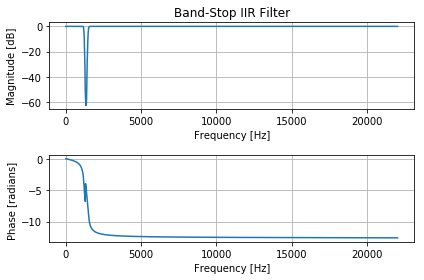

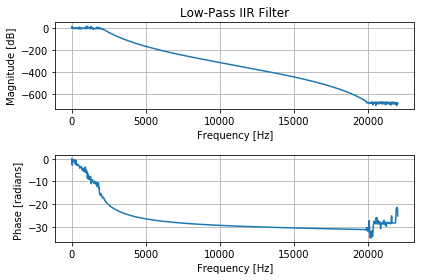

In [3]:
from functions.lab_functions import plot_spec

w, h = signal.freqz(b_iir_bsf, a_iir_bsf, worN=1024)
f_step = w*fs/(2*np.pi)
plt = plot_spec(f_step, h, title='Band-Stop IIR Filter', dB=True)
plt.show()

w, h = signal.freqz(b_iir_lpf, a_iir_lpf, worN=1024)
f_step = w*fs/(2*np.pi)
plt = plot_spec(f_step, h, title='Low-Pass IIR Filter', dB=True)
plt.show()

**Question 7.2** Derive the impulse response of: $y[n] = 0.5 x[n] + 0.5 y[n-1]$?

**Question 7.3** Why does an IIR filter have to be implemented recursively (i.e. does it absolutely need to use past output values)?

**Question 7.4** Compare the advantages and disadvantages of FIR and IIR filters (Hint: look at the number of coefficients required to implement both types of filters.)